1. Data Manipulation
a. Read the provided CSV file ‘data.csv’.
b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
c. Show the basic statistical description about the data.
d. Check if the data has null values.
i. Replace the null values with the mean
e. Select at least two columns and aggregate the data using: min, max, count,mean.
f. Filter the dataframe to select the rows with calories values between 500 and1000.
g. Filter the dataframe to select the rows with calories values > 500 and pulse <100.
h. Create a new “df_modified” dataframe that contains all the columns from df exceptfor
“Maxpulse”.
i. Delete the “Maxpulse” column from the main df dataframe
j. Convert the datatype of Calories column to int datatype.
k. Using pandas create a scatter plot for the two columns (Duration andCalories).

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("/content/data.csv")

In [99]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [100]:
df.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [101]:
df.shape

(169, 4)

In [102]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [103]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [104]:
df.fillna(df.mean(),inplace=True)

In [105]:
print(df[["Duration","Calories"]].agg(["min", "max", "count", "mean"]))


         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [106]:
df_filtered = df[df['Calories'].between(500, 1000)]

In [107]:
df_filtered = df[((df['Calories'] > 500) & (df['Pulse'] < 100))]

In [108]:
df_modified= df.drop(columns="Maxpulse", axis=1)

In [109]:
df.drop(columns=['Maxpulse'], axis=1, inplace=True)

In [110]:
df['Calories'] = df['Calories'].astype(int)

<Axes: xlabel='Duration', ylabel='Calories'>

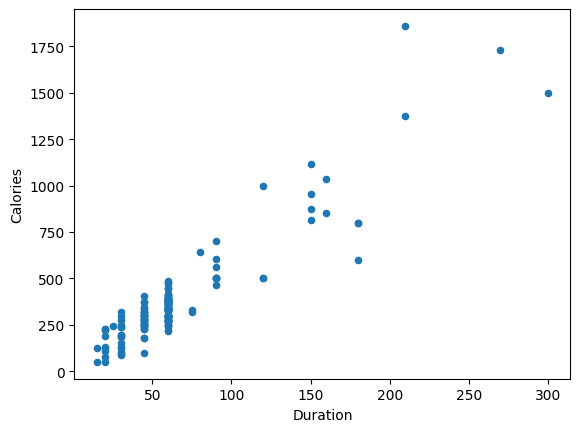

In [111]:
df.plot.scatter(x='Duration', y='Calories')

2. Linear Regression
a) Import the given “Salary_Data.csv”
b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c) Train and predict the model.
d) Calculate the mean_squared error
e) Visualize both train and test data using scatter plot.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
salary_dataset=pd.read_csv("/content/Salary_Data (1).csv")

In [42]:
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
salary_dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [44]:
salary_dataset.shape

(30, 2)

In [45]:
salary_dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [46]:
salary_dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
x=salary_dataset.iloc[:,:-1]
y=salary_dataset.iloc[:,-1]

In [48]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [49]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)

In [51]:
model=LinearRegression()

In [52]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [81]:
mse=mean_squared_error(y_pred,y_test)

In [82]:
print("Mean Squared Error :",mse)

Mean Squared Error : 35301898.887134895


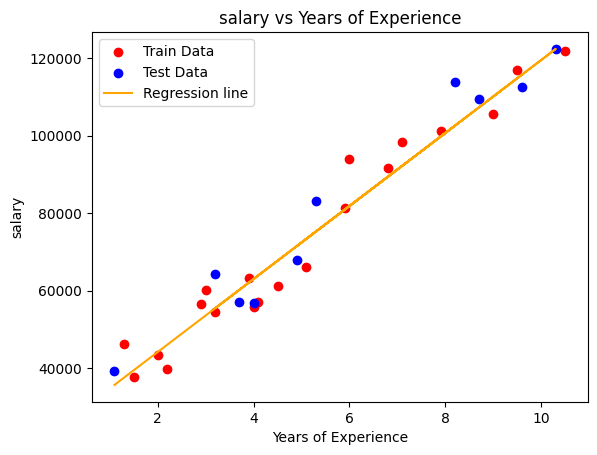

In [83]:
plt.scatter(x_train,y_train,label="Train Data",color="red")
plt.scatter(x_test,y_test,label="Test Data",color="blue")
plt.plot(x_test,y_pred,label="Regression line",color="Orange")
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title("salary vs Years of Experience")
plt.legend()
plt.show()